In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

In [59]:
results = pd.read_csv("newww/optimize.csv").drop(columns = 'Unnamed: 0')

In [60]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   0_RfR 0                      127 non-null    int64  
 1   0_RfR 1                      127 non-null    int64  
 2   0_RfR 2                      127 non-null    int64  
 3   1_RfR 0                      127 non-null    int64  
 4   1_RfR 1                      127 non-null    int64  
 5   1_RfR 2                      127 non-null    int64  
 6   2_RfR 0                      127 non-null    int64  
 7   2_RfR 1                      127 non-null    int64  
 8   2_RfR 2                      127 non-null    int64  
 9   3_RfR 0                      127 non-null    int64  
 10  3_RfR 1                      127 non-null    int64  
 11  3_RfR 2                      127 non-null    int64  
 12  4_RfR 0                      127 non-null    int64  
 13  4_RfR 1             

In [6]:
#results.loc[:,"Expected Number of Deaths 1"]

0      0.000110
1      0.000000
2      0.000137
3      0.000000
4      0.000913
         ...   
122    0.000137
123    0.000000
124    0.000000
125    0.000110
126    0.000110
Name: Expected Number of Deaths 1, Length: 127, dtype: float64

In [7]:
#results.loc[results["Expected Number of Deaths 1"] <= 0.001,:]

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.5_DikeIncrease 2,Expected Annual Damage 0,Total Investment Costs 0,Expected Number of Deaths 0,Expected Annual Damage 1,Total Investment Costs 1,Expected Number of Deaths 1,Expected Annual Damage 2,Total Investment Costs 2,Expected Number of Deaths 2
0,0,0,0,0,0,0,0,1,0,0,...,0,214616.329692,2.050475e+08,0.000110,199145.577611,4.176879e+07,0.000110,214616.329692,2.209943e+01,0.000110
1,0,0,0,0,0,0,1,0,0,0,...,0,0.000000,2.576127e+08,0.000000,0.000000,0.000000e+00,0.000000,0.000000,2.746701e+07,0.000000
2,0,1,0,0,0,0,0,1,0,0,...,0,214616.329692,1.954509e+08,0.000137,199145.577611,1.226321e+08,0.000137,214616.329692,1.778837e+01,0.000137
3,0,1,1,0,0,0,0,1,0,0,...,0,214616.329692,1.627560e+08,0.000110,0.000000,1.469605e+08,0.000000,0.000000,8.460000e+07,0.000000
4,0,1,0,0,0,0,0,1,0,0,...,0,214616.329692,1.954509e+08,0.000913,199145.577611,1.226321e+08,0.000913,0.000000,2.900423e+07,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,0,0,1,0,0,0,0,1,0,0,...,0,214616.329692,1.954509e+08,0.000137,199145.577611,3.803210e+07,0.000137,0.000000,1.111595e+08,0.000000
123,0,1,0,0,0,0,0,0,1,0,...,0,0.000000,1.987749e+08,0.000000,0.000000,9.092080e+07,0.000000,0.000000,3.070000e+07,0.000000
124,0,1,0,0,0,0,0,1,0,0,...,0,214616.329692,1.954509e+08,0.000137,0.000000,1.580293e+08,0.000000,0.000000,0.000000e+00,0.000000
125,0,1,0,0,1,0,0,0,1,0,...,0,214616.329692,1.627560e+08,0.000110,199145.577611,3.087208e+08,0.000110,0.000000,5.970423e+07,0.000000


In [61]:
outcomes_to_look = results.iloc[:, -9:]

In [9]:
outcomes_to_look

,Expected Annual Damage 0,Total Investment Costs 0,Expected Number of Deaths 0,Expected Annual Damage 1,Total Investment Costs 1,Expected Number of Deaths 1,Expected Annual Damage 2,Total Investment Costs 2,Expected Number of Deaths 2
0,214616.329692,2.050475e+08,0.000110,199145.577611,4.176879e+07,0.000110,214616.329692,2.209943e+01,0.000110
1,0.000000,2.576127e+08,0.000000,0.000000,0.000000e+00,0.000000,0.000000,2.746701e+07,0.000000
2,214616.329692,1.954509e+08,0.000137,199145.577611,1.226321e+08,0.000137,214616.329692,1.778837e+01,0.000137
3,214616.329692,1.627560e+08,0.000110,0.000000,1.469605e+08,0.000000,0.000000,8.460000e+07,0.000000
4,214616.329692,1.954509e+08,0.000913,199145.577611,1.226321e+08,0.000913,0.000000,2.900423e+07,0.000000
...,...,...,...,...,...,...,...,...,...
122,214616.329692,1.954509e+08,0.000137,199145.577611,3.803210e+07,0.000137,0.000000,1.111595e+08,0.000000
123,0.000000,1.987749e+08,0.000000,0.000000,9.092080e+07,0.000000,0.000000,3.070000e+07,0.000000
124,214616.329692,1.954509e+08,0.000137,0.000000,1.580293e+08,0.000000,0.000000,0.000000e+00,0.000000
125,214616.329692,1.627560e+08,0.000110,199145.577611,3.087208e+08,0.000110,0.000000,5.970423e+07,0.000000


In [8]:
#results['sum_costs_15_years'] = results.iloc[:, [31,32,34,35]].sum(axis = 1)


In [9]:
#results['sum_costs_15_years'] = results['sum_costs_15_years'] + 14 * results.loc[:, "Expected Annual Damage 0"]

In [10]:
# constrained_results = results.loc[(results["sum_costs_15_years"] <= 250000000) & \
#                                   (results["Expected Number of Deaths 1"] <= 0.001) &\
#                                   (results["Expected Annual Damage 0"] <= 500000),:]

In [11]:
# outcomes_15_years = constrained_results.iloc[:, [31,32,38,34,35]]

In [12]:
outcomes_renamed = outcomes_to_look.rename(columns = {"Expected Annual Damage 0": "EAD0", "Expected Annual Damage 1": "EAD1",
"Expected Annual Damage 2": "EAD2","Total Investment Costs 0": "TIC0","Total Investment Costs 1": "TIC1",
"Total Investment Costs 2": "TIC2","Expected Number of Deaths 0": "END0", "Expected Number of Deaths 1": "END1","Expected Number of Deaths 2": "END2"})

In [ ]:
# constrained_results = results.loc[(results["sum_costs_15_years"] <= 250000000) & \
#                                    (results["Expected Annual Damage 0"] <= 500000),:]

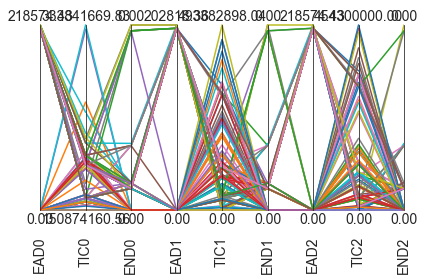

In [13]:
from ema_workbench.analysis import parcoords


limits = parcoords.get_limits(outcomes_renamed)
axes = parcoords.ParallelAxes(limits)
axes.plot(outcomes_renamed)


plt.show()

In [62]:
results.sort_values(by='Total Investment Costs 0', ascending=True).head()

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.5_DikeIncrease 2,Expected Annual Damage 0,Total Investment Costs 0,Expected Number of Deaths 0,Expected Annual Damage 1,Total Investment Costs 1,Expected Number of Deaths 1,Expected Annual Damage 2,Total Investment Costs 2,Expected Number of Deaths 2
101,0,1,1,0,0,0,0,1,1,0,...,3,0.0,1.508742e+08,0.0,0.0,4.014224e+08,0.0,0.0,1.524308e+08,0.0
107,0,1,1,0,0,0,0,1,1,0,...,1,0.0,1.508742e+08,0.0,0.0,2.630595e+08,0.0,0.0,1.759248e+08,0.0
90,0,1,1,0,0,0,0,1,1,0,...,2,0.0,1.547940e+08,0.0,0.0,3.067240e+08,0.0,0.0,1.501909e+08,0.0
73,0,1,1,0,0,0,0,1,1,0,...,0,0.0,1.557726e+08,0.0,0.0,2.461952e+08,0.0,0.0,1.153000e+08,0.0
52,0,1,1,0,0,0,0,1,1,0,...,1,0.0,1.557726e+08,0.0,0.0,2.438321e+08,0.0,0.0,1.611825e+08,0.0


101 and 107 perform well both in terms of Total Investment Costs and Expected Annual Damage, thus we take these two policies from this optimization scenario

In [63]:
policies_worstcost_scenario = results.loc[[101, 107],:]

In [64]:
policies = policies_worstcost_scenario.iloc[:, :31]

In [21]:
policies

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.2_DikeIncrease 2,A.3_DikeIncrease 0,A.3_DikeIncrease 1,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2
101,0,1,1,0,0,0,0,1,1,0,...,0,8,1,0,0,4,0,6,0,3
107,0,1,1,0,0,0,0,1,1,0,...,0,8,1,2,0,0,0,6,0,1


In [22]:
policies.to_csv("policies_worstcost.csv")

In [ ]:
# from ema_workbench import Policy

# policies_to_evaluate = []

# for i, policy in policies.iterrows():
#     policies_to_evaluate.append(Policy(str(i), **policy.to_dict()))

In [ ]:
# policies_to_evaluate

In [ ]:
# pd.read_csv("policies.csv").drop(columns = "Unnamed: 0")

# Median Cost Scenario

In [23]:
results = pd.read_csv("newww/optimize_median_costs.csv").drop(columns = 'Unnamed: 0')

In [24]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   0_RfR 0                      56 non-null     int64  
 1   0_RfR 1                      56 non-null     int64  
 2   0_RfR 2                      56 non-null     int64  
 3   1_RfR 0                      56 non-null     int64  
 4   1_RfR 1                      56 non-null     int64  
 5   1_RfR 2                      56 non-null     int64  
 6   2_RfR 0                      56 non-null     int64  
 7   2_RfR 1                      56 non-null     int64  
 8   2_RfR 2                      56 non-null     int64  
 9   3_RfR 0                      56 non-null     int64  
 10  3_RfR 1                      56 non-null     int64  
 11  3_RfR 2                      56 non-null     int64  
 12  4_RfR 0                      56 non-null     int64  
 13  4_RfR 1               

In [25]:
#results.loc[:,"Expected Number of Deaths 1"]

In [7]:
#results.loc[results["Expected Number of Deaths 1"] <= 0.001,:]

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.5_DikeIncrease 2,Expected Annual Damage 0,Total Investment Costs 0,Expected Number of Deaths 0,Expected Annual Damage 1,Total Investment Costs 1,Expected Number of Deaths 1,Expected Annual Damage 2,Total Investment Costs 2,Expected Number of Deaths 2
0,0,0,0,0,0,0,0,1,0,0,...,0,214616.329692,2.050475e+08,0.000110,199145.577611,4.176879e+07,0.000110,214616.329692,2.209943e+01,0.000110
1,0,0,0,0,0,0,1,0,0,0,...,0,0.000000,2.576127e+08,0.000000,0.000000,0.000000e+00,0.000000,0.000000,2.746701e+07,0.000000
2,0,1,0,0,0,0,0,1,0,0,...,0,214616.329692,1.954509e+08,0.000137,199145.577611,1.226321e+08,0.000137,214616.329692,1.778837e+01,0.000137
3,0,1,1,0,0,0,0,1,0,0,...,0,214616.329692,1.627560e+08,0.000110,0.000000,1.469605e+08,0.000000,0.000000,8.460000e+07,0.000000
4,0,1,0,0,0,0,0,1,0,0,...,0,214616.329692,1.954509e+08,0.000913,199145.577611,1.226321e+08,0.000913,0.000000,2.900423e+07,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,0,0,1,0,0,0,0,1,0,0,...,0,214616.329692,1.954509e+08,0.000137,199145.577611,3.803210e+07,0.000137,0.000000,1.111595e+08,0.000000
123,0,1,0,0,0,0,0,0,1,0,...,0,0.000000,1.987749e+08,0.000000,0.000000,9.092080e+07,0.000000,0.000000,3.070000e+07,0.000000
124,0,1,0,0,0,0,0,1,0,0,...,0,214616.329692,1.954509e+08,0.000137,0.000000,1.580293e+08,0.000000,0.000000,0.000000e+00,0.000000
125,0,1,0,0,1,0,0,0,1,0,...,0,214616.329692,1.627560e+08,0.000110,199145.577611,3.087208e+08,0.000110,0.000000,5.970423e+07,0.000000


In [26]:
outcomes_to_look = results.iloc[:, -9:]

In [28]:
outcomes_to_look.head()

,Expected Annual Damage 0,Total Investment Costs 0,Expected Number of Deaths 0,Expected Annual Damage 1,Total Investment Costs 1,Expected Number of Deaths 1,Expected Annual Damage 2,Total Investment Costs 2,Expected Number of Deaths 2
0,0.000000e+00,5.884014e+07,0.000000,0.000000e+00,8.460000e+07,0.000000,0.000000e+00,3.070000e+07,0.000000
1,1.079618e+06,5.251955e+07,0.000205,1.157815e+06,2.091324e+02,0.000205,1.244667e+06,1.153002e+08,0.000205
2,1.079618e+06,8.977476e+07,0.000205,1.157815e+06,2.091324e+02,0.000205,1.244667e+06,3.070021e+07,0.000205
3,0.000000e+00,4.974605e+07,0.000000,0.000000e+00,1.212000e+08,0.000000,0.000000e+00,1.153000e+08,0.000000
4,1.079618e+06,5.251955e+07,0.000205,1.157815e+06,2.091324e+02,0.000205,0.000000e+00,1.216208e+08,0.000000


In [8]:
#results['sum_costs_15_years'] = results.iloc[:, [31,32,34,35]].sum(axis = 1)


In [9]:
#results['sum_costs_15_years'] = results['sum_costs_15_years'] + 14 * results.loc[:, "Expected Annual Damage 0"]

In [10]:
# constrained_results = results.loc[(results["sum_costs_15_years"] <= 250000000) & \
#                                   (results["Expected Number of Deaths 1"] <= 0.001) &\
#                                   (results["Expected Annual Damage 0"] <= 500000),:]

In [11]:
# outcomes_15_years = constrained_results.iloc[:, [31,32,38,34,35]]

In [29]:
outcomes_renamed = outcomes_to_look.rename(columns = {"Expected Annual Damage 0": "EAD0", "Expected Annual Damage 1": "EAD1",
"Expected Annual Damage 2": "EAD2","Total Investment Costs 0": "TIC0","Total Investment Costs 1": "TIC1",
"Total Investment Costs 2": "TIC2","Expected Number of Deaths 0": "END0", "Expected Number of Deaths 1": "END1","Expected Number of Deaths 2": "END2"})

In [ ]:
# constrained_results = results.loc[(results["sum_costs_15_years"] <= 250000000) & \
#                                    (results["Expected Annual Damage 0"] <= 500000),:]

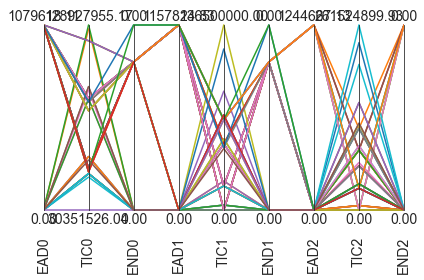

In [30]:
from ema_workbench.analysis import parcoords


limits = parcoords.get_limits(outcomes_renamed)
axes = parcoords.ParallelAxes(limits)
axes.plot(outcomes_renamed)


plt.show()

In [32]:
results['TotalInvestment']= results['Total Investment Costs 0']+results['Total Investment Costs 1']+\
results['Total Investment Costs 2']

In [33]:
results.sort_values(by='Total Investment Costs 0', ascending=True).head()

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,Expected Annual Damage 0,Total Investment Costs 0,Expected Number of Deaths 0,Expected Annual Damage 1,Total Investment Costs 1,Expected Number of Deaths 1,Expected Annual Damage 2,Total Investment Costs 2,Expected Number of Deaths 2,TotalInvestment
54,0,1,0,0,0,0,0,1,1,0,...,0.0,3.035153e+07,0.0,0.0,115300000.0,0.0,0.0,1.519000e+08,0.0,2.975515e+08
39,0,0,1,0,0,0,0,1,1,0,...,0.0,4.787752e+07,0.0,0.0,30700000.0,0.0,0.0,2.615249e+08,0.0,3.401024e+08
14,0,0,1,0,0,0,0,1,0,0,...,0.0,4.974605e+07,0.0,0.0,151900000.0,0.0,0.0,8.460000e+07,0.0,2.862460e+08
40,0,1,0,0,0,0,0,0,1,0,...,0.0,4.974605e+07,0.0,0.0,205800000.0,0.0,0.0,3.070000e+07,0.0,2.862460e+08
20,0,0,1,0,0,0,0,0,1,0,...,0.0,4.974605e+07,0.0,0.0,0.0,0.0,0.0,2.365000e+08,0.0,2.862460e+08


54 performs the best in terms of first 15 years investment costs and 20 was evaluated as interesting because it does not suggests making any investment in the second planning step, thus we take these two policies from this optimization scenario

In [38]:
policies_mediancost_scenario = results.loc[[54, 20],:]

In [41]:
policies_mediancost_scenario

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,Expected Annual Damage 0,Total Investment Costs 0,Expected Number of Deaths 0,Expected Annual Damage 1,Total Investment Costs 1,Expected Number of Deaths 1,Expected Annual Damage 2,Total Investment Costs 2,Expected Number of Deaths 2,TotalInvestment
54,0,1,0,0,0,0,0,1,1,0,...,0.0,3.035153e+07,0.0,0.0,115300000.0,0.0,0.0,151900000.0,0.0,2.975515e+08
20,0,0,1,0,0,0,0,0,1,0,...,0.0,4.974605e+07,0.0,0.0,0.0,0.0,0.0,236500000.0,0.0,2.862460e+08


In [39]:
policies = policies_mediancost_scenario.iloc[:, :31]

In [40]:
policies

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.2_DikeIncrease 2,A.3_DikeIncrease 0,A.3_DikeIncrease 1,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2
54,0,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,3,0,0
20,0,0,1,0,0,0,0,0,1,0,...,0,2,0,0,0,0,0,2,0,0


In [42]:
policies.to_csv("policies_mediancost.csv")

# Median Deaths

In [74]:
results = pd.read_csv("newww/optimize_median_deaths.csv").drop(columns = 'Unnamed: 0')

In [75]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   0_RfR 0                      626 non-null    int64  
 1   0_RfR 1                      626 non-null    int64  
 2   0_RfR 2                      626 non-null    int64  
 3   1_RfR 0                      626 non-null    int64  
 4   1_RfR 1                      626 non-null    int64  
 5   1_RfR 2                      626 non-null    int64  
 6   2_RfR 0                      626 non-null    int64  
 7   2_RfR 1                      626 non-null    int64  
 8   2_RfR 2                      626 non-null    int64  
 9   3_RfR 0                      626 non-null    int64  
 10  3_RfR 1                      626 non-null    int64  
 11  3_RfR 2                      626 non-null    int64  
 12  4_RfR 0                      626 non-null    int64  
 13  4_RfR 1             

In [45]:
#results.loc[:,"Expected Number of Deaths 1"]

In [46]:
#results.loc[results["Expected Number of Deaths 1"] <= 0.001,:]

In [76]:
outcomes_to_look = results.iloc[:, -9:]

In [77]:
outcomes_to_look

,Expected Annual Damage 0,Total Investment Costs 0,Expected Number of Deaths 0,Expected Annual Damage 1,Total Investment Costs 1,Expected Number of Deaths 1,Expected Annual Damage 2,Total Investment Costs 2,Expected Number of Deaths 2
0,2.282443e+05,1.863650e+08,0.000134,0.000000,4.014253e+07,0.000000,0.000000,8.713664e+07,0.000000
1,2.282443e+05,1.780700e+08,0.000045,0.000000,6.741992e+07,0.000000,0.000000,7.805420e+07,0.000000
2,0.000000e+00,2.169004e+08,0.000000,0.000000,1.507168e+08,0.000000,0.000000,2.711919e+07,0.000000
3,7.342470e+05,1.554157e+08,0.000718,846496.640692,1.897298e+08,0.000718,787428.495335,6.405356e+07,0.000718
4,2.282443e+05,1.662985e+08,0.000373,0.000000,3.907525e+07,0.000000,0.000000,1.256852e+08,0.000000
...,...,...,...,...,...,...,...,...,...
621,3.362611e+06,1.290069e+08,0.000913,857740.835599,4.544908e+07,0.000307,0.000000,1.955835e+08,0.000000
622,2.282443e+05,1.633872e+08,0.000045,0.000000,1.526340e+08,0.000000,0.000000,3.880969e+07,0.000000
623,7.440002e+05,9.000426e+07,0.000246,857740.835599,1.819829e+08,0.000246,797888.075504,9.822901e+07,0.000246
624,0.000000e+00,1.399631e+08,0.000000,0.000000,2.721668e+08,0.000000,0.000000,3.070000e+07,0.000000


In [8]:
#results['sum_costs_15_years'] = results.iloc[:, [31,32,34,35]].sum(axis = 1)


In [9]:
#results['sum_costs_15_years'] = results['sum_costs_15_years'] + 14 * results.loc[:, "Expected Annual Damage 0"]

In [10]:
# constrained_results = results.loc[(results["sum_costs_15_years"] <= 250000000) & \
#                                   (results["Expected Number of Deaths 1"] <= 0.001) &\
#                                   (results["Expected Annual Damage 0"] <= 500000),:]

In [11]:
# outcomes_15_years = constrained_results.iloc[:, [31,32,38,34,35]]

In [78]:
outcomes_renamed = outcomes_to_look.rename(columns = {"Expected Annual Damage 0": "EAD0", "Expected Annual Damage 1": "EAD1",
"Expected Annual Damage 2": "EAD2","Total Investment Costs 0": "TIC0","Total Investment Costs 1": "TIC1",
"Total Investment Costs 2": "TIC2","Expected Number of Deaths 0": "END0", "Expected Number of Deaths 1": "END1","Expected Number of Deaths 2": "END2"})

In [ ]:
# constrained_results = results.loc[(results["sum_costs_15_years"] <= 250000000) & \
#                                    (results["Expected Annual Damage 0"] <= 500000),:]

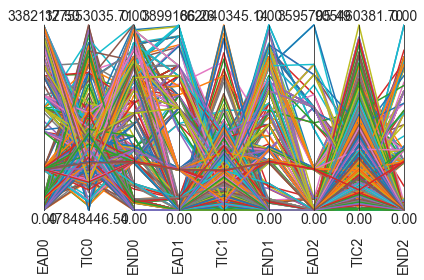

In [79]:
from ema_workbench.analysis import parcoords


limits = parcoords.get_limits(outcomes_renamed)
axes = parcoords.ParallelAxes(limits)
axes.plot(outcomes_renamed)


plt.show()

In [81]:
results['TotalInvestment']= results['Total Investment Costs 0']+results['Total Investment Costs 1']+\
results['Total Investment Costs 2']

In [82]:
results.sort_values(by='Total Investment Costs 0', ascending=True).head()

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,Expected Annual Damage 0,Total Investment Costs 0,Expected Number of Deaths 0,Expected Annual Damage 1,Total Investment Costs 1,Expected Number of Deaths 1,Expected Annual Damage 2,Total Investment Costs 2,Expected Number of Deaths 2,TotalInvestment
400,0,1,1,0,0,0,0,1,1,0,...,3.172122e+06,4.784845e+07,0.000837,3.657067e+06,1.153005e+08,0.000837,1.919693e+06,3.630878e+08,0.000681,5.262368e+08
510,0,1,1,0,0,0,0,1,1,0,...,3.172122e+06,4.784845e+07,0.000837,3.657067e+06,1.900790e+08,0.000837,2.627889e+06,4.154793e+08,0.000541,6.534067e+08
222,0,0,1,0,0,1,0,1,1,0,...,7.361976e+05,5.397260e+07,0.000301,0.000000e+00,5.179619e+08,0.000000,0.000000e+00,8.073828e+08,0.000000,1.379317e+09
158,0,1,1,0,0,1,0,1,1,0,...,2.981632e+06,5.397299e+07,0.000762,2.290369e+05,3.790103e+08,0.000045,0.000000e+00,6.309383e+08,0.000000,1.063922e+09
165,0,1,0,0,0,0,0,1,1,0,...,2.981632e+06,5.397299e+07,0.000762,3.437456e+06,3.266171e+08,0.000762,0.000000e+00,2.743790e+08,0.000000,6.549690e+08


400 is the one with cheapest investment in first 15 years and 222 perform well in terms of Expected Annual Damage, thus we take these two policies from this optimization scenario.

In [83]:
policies_mediandeaths_scenario = results.loc[[400, 222],:]

In [84]:
policies = policies_mediandeaths_scenario.iloc[:, :31]

In [85]:
policies

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.2_DikeIncrease 2,A.3_DikeIncrease 0,A.3_DikeIncrease 1,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2
400,0,1,1,0,0,0,0,1,1,0,...,3,0,0,5,0,0,2,0,0,0
222,0,0,1,0,0,1,0,1,1,0,...,0,0,7,6,0,4,1,0,0,0


In [86]:
policies.to_csv("policies_mediandeaths.csv")

In [65]:
df = pd.concat([policies_worstcost_scenario.iloc[:, :31],
policies_mediancost_scenario.iloc[:, :31],
policies_mediandeaths_scenario.iloc[:, :31]])

In [66]:
df

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.2_DikeIncrease 2,A.3_DikeIncrease 0,A.3_DikeIncrease 1,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2
101,0,1,1,0,0,0,0,1,1,0,...,0,8,1,0,0,4,0,6,0,3
107,0,1,1,0,0,0,0,1,1,0,...,0,8,1,2,0,0,0,6,0,1
54,0,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,3,0,0
20,0,0,1,0,0,0,0,0,1,0,...,0,2,0,0,0,0,0,2,0,0
520,0,1,1,0,0,0,0,1,1,0,...,1,3,3,3,0,1,3,0,3,0
315,0,1,1,0,0,0,0,1,1,0,...,1,4,0,6,0,0,0,0,3,0


In [67]:
df.to_csv('all_policies.csv')

In [69]:
dude=pd.read_csv('all_policies.csv').drop(columns = "Unnamed: 0")

In [70]:
from ema_workbench import Policy

In [72]:
policies_to_evaluate = []
for i, policy in dude.iterrows():
    policies_to_evaluate.append(Policy(str(i), **policy.to_dict()))

In [73]:
policies_to_evaluate

[Policy({'0_RfR 0': 0, '0_RfR 1': 1, '0_RfR 2': 1, '1_RfR 0': 0, '1_RfR 1': 0, '1_RfR 2': 0, '2_RfR 0': 0, '2_RfR 1': 1, '2_RfR 2': 1, '3_RfR 0': 0, '3_RfR 1': 1, '3_RfR 2': 0, '4_RfR 0': 0, '4_RfR 1': 0, '4_RfR 2': 0, 'EWS_DaysToThreat': 2, 'A.1_DikeIncrease 0': 0, 'A.1_DikeIncrease 1': 7, 'A.1_DikeIncrease 2': 0, 'A.2_DikeIncrease 0': 7, 'A.2_DikeIncrease 1': 3, 'A.2_DikeIncrease 2': 0, 'A.3_DikeIncrease 0': 8, 'A.3_DikeIncrease 1': 1, 'A.3_DikeIncrease 2': 0, 'A.4_DikeIncrease 0': 0, 'A.4_DikeIncrease 1': 4, 'A.4_DikeIncrease 2': 0, 'A.5_DikeIncrease 0': 6, 'A.5_DikeIncrease 1': 0, 'A.5_DikeIncrease 2': 3}),
 Policy({'0_RfR 0': 0, '0_RfR 1': 1, '0_RfR 2': 1, '1_RfR 0': 0, '1_RfR 1': 0, '1_RfR 2': 0, '2_RfR 0': 0, '2_RfR 1': 1, '2_RfR 2': 1, '3_RfR 0': 0, '3_RfR 1': 1, '3_RfR 2': 0, '4_RfR 0': 0, '4_RfR 1': 0, '4_RfR 2': 0, 'EWS_DaysToThreat': 0, 'A.1_DikeIncrease 0': 0, 'A.1_DikeIncrease 1': 0, 'A.1_DikeIncrease 2': 0, 'A.2_DikeIncrease 0': 7, 'A.2_DikeIncrease 1': 0, 'A.2_DikeIncre